<a href="https://colab.research.google.com/github/Maryam-71295/Day2-challenge-of-Pyspan/blob/main/Day4_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install pyspan

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyspan as ps
import seaborn as sns
import plotly.express as px

In [30]:
df = pd.read_csv('/content/Customer_support_data.csv')
df.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,1/8/2023 11:13,1/8/2023 11:47,1-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,1/8/2023 12:52,1/8/2023 12:54,1-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,1/8/2023 20:16,1/8/2023 20:38,1-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,1/8/2023 20:56,1/8/2023 21:16,1-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,1/8/2023 10:30,1/8/2023 10:32,1-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [31]:
df.shape

(85907, 20)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

In [33]:
df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [34]:
df = ps.remove(df, operation='columns', columns=['Customer_City', 'Product_category', 'order_date_time', 'Item_price', 'connected_handling_time'])
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,Issue_reported at,issue_responded,Survey_response_Date,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,1/8/2023 11:13,1/8/2023 11:47,1-Aug-23,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,1/8/2023 12:52,1/8/2023 12:54,1-Aug-23,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,1/8/2023 20:16,1/8/2023 20:38,1-Aug-23,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,1/8/2023 20:56,1/8/2023 21:16,1-Aug-23,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,1/8/2023 10:30,1/8/2023 10:32,1-Aug-23,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [35]:
#handle null values
df.isnull().sum()

,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,57165
Order_id,18232
Issue_reported at,0
issue_responded,0
Survey_response_Date,0
Agent_name,0


In [36]:
#replace null values "No_Order_Id"
df = ps.handle_nulls(df, columns = 'Order_id', action = 'replace', with_val = 'No_Order_Id')

In [37]:
df = ps.remove_chars(df, columns=['CSAT Score'], custom_characters=' ')
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,Issue_reported at,issue_responded,Survey_response_Date,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,1/8/2023 11:13,1/8/2023 11:47,1-Aug-23,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,1/8/2023 12:52,1/8/2023 12:54,1-Aug-23,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,1/8/2023 20:16,1/8/2023 20:38,1-Aug-23,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,1/8/2023 20:56,1/8/2023 21:16,1-Aug-23,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,1/8/2023 10:30,1/8/2023 10:32,1-Aug-23,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [38]:
df = ps.format_dt(df, columns = 'Survey_response_Date', day_of_week= True)
df.head()

/usr/local/lib/python3.10/dist-packages/pyspan.py:475: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[column] = pd.to_datetime(df[column])


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,Issue_reported at,issue_responded,Survey_response_Date,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Survey_response_Date_day_of_week
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,1/8/2023 11:13,1/8/2023 11:47,2023-08-01 00:00:00,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,Tuesday
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,1/8/2023 12:52,1/8/2023 12:54,2023-08-01 00:00:00,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,Tuesday
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,1/8/2023 20:16,1/8/2023 20:38,2023-08-01 00:00:00,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,Tuesday
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,1/8/2023 20:56,1/8/2023 21:16,2023-08-01 00:00:00,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,Tuesday
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,1/8/2023 10:30,1/8/2023 10:32,2023-08-01 00:00:00,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,Tuesday


In [39]:
df = ps.format_dt(df, columns='Survey_response_Date')
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,Issue_reported at,issue_responded,Survey_response_Date,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Survey_response_Date_day_of_week
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,1/8/2023 11:13,1/8/2023 11:47,2023-08-01 00:00:00,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,Tuesday
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,1/8/2023 12:52,1/8/2023 12:54,2023-08-01 00:00:00,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,Tuesday
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,1/8/2023 20:16,1/8/2023 20:38,2023-08-01 00:00:00,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,Tuesday
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,1/8/2023 20:56,1/8/2023 21:16,2023-08-01 00:00:00,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,Tuesday
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,1/8/2023 10:30,1/8/2023 10:32,2023-08-01 00:00:00,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,Tuesday


In [40]:
df_replace = ps.handle_nulls(df, columns='Customer Remarks', action='replace', with_val='No Remarks', inplace=True)
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,Issue_reported at,issue_responded,Survey_response_Date,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Survey_response_Date_day_of_week
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,No Remarks,c27c9bb4-fa36-4140-9f1f-21009254ffdb,1/8/2023 11:13,1/8/2023 11:47,2023-08-01 00:00:00,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,Tuesday
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,No Remarks,d406b0c7-ce17-4654-b9de-f08d421254bd,1/8/2023 12:52,1/8/2023 12:54,2023-08-01 00:00:00,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,Tuesday
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,No Remarks,c273368d-b961-44cb-beaf-62d6fd6c00d5,1/8/2023 20:16,1/8/2023 20:38,2023-08-01 00:00:00,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,Tuesday
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,No Remarks,5aed0059-55a4-4ec6-bb54-97942092020a,1/8/2023 20:56,1/8/2023 21:16,2023-08-01 00:00:00,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,Tuesday
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,No Remarks,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,1/8/2023 10:30,1/8/2023 10:32,2023-08-01 00:00:00,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,Tuesday


In [41]:
df = ps.remove(df, operation='columns', columns=['Agent_name', 'Supervisor', 'Manager'])
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,Issue_reported at,issue_responded,Survey_response_Date,Tenure Bucket,Agent Shift,CSAT Score,Survey_response_Date_day_of_week
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,No Remarks,c27c9bb4-fa36-4140-9f1f-21009254ffdb,1/8/2023 11:13,1/8/2023 11:47,2023-08-01 00:00:00,On Job Training,Morning,5,Tuesday
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,No Remarks,d406b0c7-ce17-4654-b9de-f08d421254bd,1/8/2023 12:52,1/8/2023 12:54,2023-08-01 00:00:00,>90,Morning,5,Tuesday
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,No Remarks,c273368d-b961-44cb-beaf-62d6fd6c00d5,1/8/2023 20:16,1/8/2023 20:38,2023-08-01 00:00:00,On Job Training,Evening,5,Tuesday
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,No Remarks,5aed0059-55a4-4ec6-bb54-97942092020a,1/8/2023 20:56,1/8/2023 21:16,2023-08-01 00:00:00,>90,Evening,5,Tuesday
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,No Remarks,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,1/8/2023 10:30,1/8/2023 10:32,2023-08-01 00:00:00,0-30,Morning,5,Tuesday


In [42]:
df = ps.split_column(df, column='Issue_reported at', delimiter=' ~ ')

In [43]:
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,issue_responded,Survey_response_Date,Tenure Bucket,Agent Shift,CSAT Score,Survey_response_Date_day_of_week,Issue_reported at_1
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,No Remarks,c27c9bb4-fa36-4140-9f1f-21009254ffdb,1/8/2023 11:47,2023-08-01 00:00:00,On Job Training,Morning,5,Tuesday,1/8/2023 11:13
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,No Remarks,d406b0c7-ce17-4654-b9de-f08d421254bd,1/8/2023 12:54,2023-08-01 00:00:00,>90,Morning,5,Tuesday,1/8/2023 12:52
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,No Remarks,c273368d-b961-44cb-beaf-62d6fd6c00d5,1/8/2023 20:38,2023-08-01 00:00:00,On Job Training,Evening,5,Tuesday,1/8/2023 20:16
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,No Remarks,5aed0059-55a4-4ec6-bb54-97942092020a,1/8/2023 21:16,2023-08-01 00:00:00,>90,Evening,5,Tuesday,1/8/2023 20:56
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,No Remarks,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,1/8/2023 10:32,2023-08-01 00:00:00,0-30,Morning,5,Tuesday,1/8/2023 10:30


In [44]:
#Univaraite Analysis
Shift_breakdown = df['Agent Shift'].value_counts()

In [45]:
X_axis = Shift_breakdown.index
Y_axis = Shift_breakdown.values

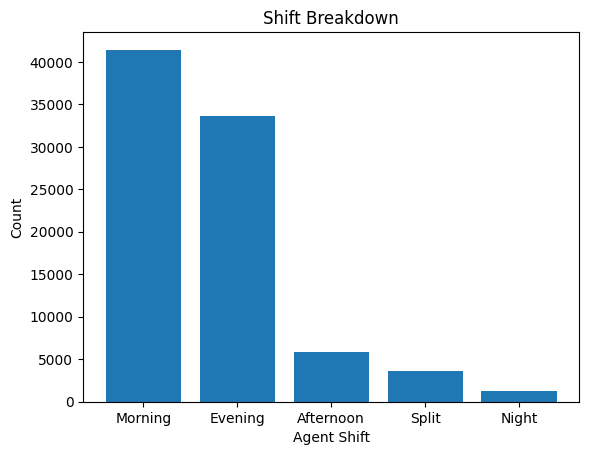

In [46]:
plt.bar(X_axis, Y_axis)
plt.title('Shift Breakdown')
plt.ylabel('Count')
plt.xlabel('Agent Shift')
plt.show()

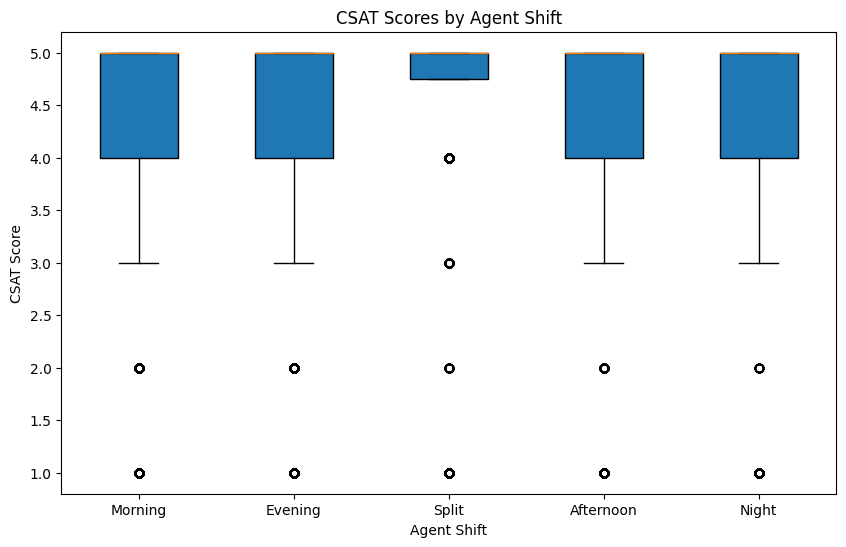

In [26]:
#Bivariate Graph
agent_shift_groups = [df[df['Agent Shift'] == shift]['CSAT Score'] for shift in df['Agent Shift'].unique()]
plt.figure(figsize=(10, 6))
plt.boxplot(agent_shift_groups, labels=df['Agent Shift'].unique(), patch_artist=True)
plt.title('CSAT Scores by Agent Shift')
plt.xlabel('Agent Shift')
plt.ylabel('CSAT Score')
plt.show()

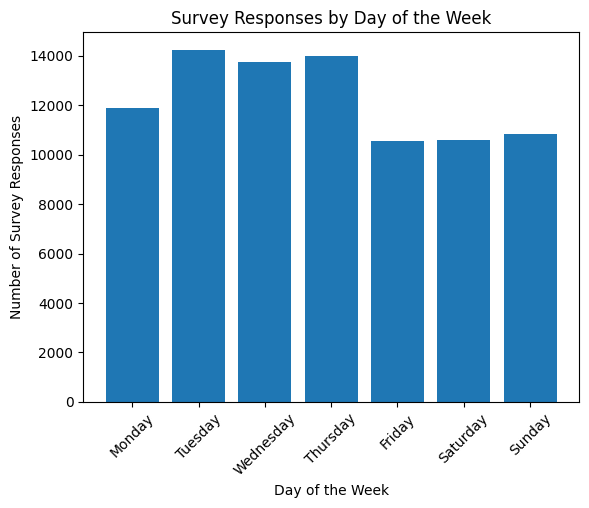

In [27]:
#Time bound Analysis
day_of_week_count = df['Survey_response_Date_day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.bar(day_of_week_count.index, day_of_week_count.values)
plt.title('Survey Responses by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Survey Responses')

# Show the plot
plt.xticks(rotation=45)
plt.show()

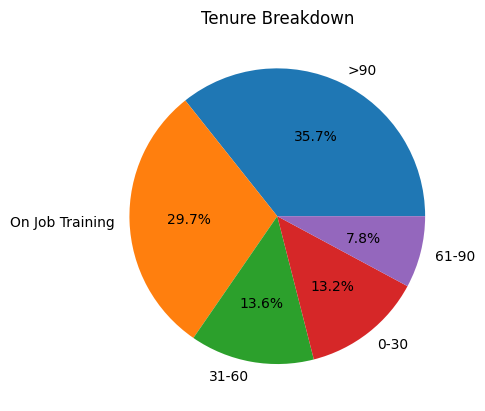

In [47]:
#My choice
#pie chart
Tenure_breakdown = df['Tenure Bucket'].value_counts()
X_axis1 = Tenure_breakdown.index
Y_axis1 = Tenure_breakdown.values
plt.pie(Y_axis1, labels=X_axis1, autopct='%1.1f%%')
plt.title('Tenure Breakdown')
plt.show()

In [53]:
#Interactive Graph
day_of_week_count = df['Survey_response_Date_day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
fig = px.bar(
    x=day_of_week_count.index,
    y=day_of_week_count.values,
    labels={'x': 'Day of the Week', 'y': 'Number of Responses'},
    title='Interactive Survey Responses by Day of the Week',
    color=day_of_week_count.values,
)
fig.show()

In [54]:
df.describe()

,CSAT Score
count,85907.000000
mean,4.242157
std,1.378903
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [59]:
mode_csat = df['CSAT Score'].mode()
print(f"Mode of CSAT Score: {mode_csat}")

Mode of CSAT Score: 0    5
Name: CSAT Score, dtype: int64
